# PROYECTO MÓDULO 1

### 1. Elegir integrantes para proyecto. Mínimo 2, máximo 3 (sin excepción). Madarme un correo con los nombres de los integrantes ya.
### 2. Deben elegir un tema para proyecto que se pueda resolver como un problema de optimización (preferiblemente, relacionado con su carrera). 
### 3. Para la siguiente semana, a más tardar, deben acercarse a mi con su tema de proyecto. Juntos, definiremos el alcance.
### 4. Fecha de entrega y presentación: 
###   11 de Marzo de 2020 (10 minutos cada equipo).

# Ideas de proyectos:
1. Programación lineal: (con base en el libro Model building in mathematical programming de H. Paul Williams)

 + Planeación de mano de obra.
 + Planeación de producción.
 ### Arbitraje usando programación lineal (Financiera) http://www.meiss.com/columbia/en/teaching/1999/fall/B6015/download/lecture05/lec5.pdf
 + Planta de tratamiento de aguas residuales de bajo costo (Ingeniería civil) Numerical Methods for Engineers pg 421
 + Problema de descubrir datos ocultos
 + Optimizar diseño de divisor de voltaje
2. Ajuste de curvas (con base en los datos en https://data.worldbank.org/indicator)

 + Histórico de temperaturas hasta 2016: ajuste de curvas y predicción de temperaturas de 2017 (comparación con datos reales).
 + Por ejemplo, CO2 emissions (kt), Forest area (sq. km), están relacionados con cambio climático. En las emisiones de CO2 parece que en los últimos años la curva tiene tendencia de concavidad hacia abajo, lo que indicaría que las políticas que se estén ejecutando si están teniendo un impacto.
 + Otro ejemplo puede ser Access to electricity (% of population). Se ve que está en constante crecimiento. Se podría estimar cuándo se llegará al 95%.

In [1]:
import sympy as sym
import numpy as np
import scipy.optimize as opt
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
archivo = 'MXN=X.csv'
data = pd.read_csv(archivo)
data

,Consecutivo,Date,Adj Close
0,1,11/03/2019,19.483200
1,2,12/03/2019,19.391300
2,3,13/03/2019,19.330400
3,4,14/03/2019,19.290100
4,5,15/03/2019,19.298599
...,...,...,...
257,258,04/03/2020,19.431601
258,259,05/03/2020,19.517200
259,260,06/03/2020,19.814501
260,261,09/03/2020,21.057501


In [3]:
x = data.iloc[:,0]
y = data.iloc[:,2]

In [4]:
def obj(beta,x,y,n):
    return np.sum((y-beta.dot([x**i for i in range(n+1)]))**2)

In [5]:
beta_01 = np.zeros(2)
sol1 = opt.minimize(obj,beta_01,args=(x,y,1))
beta_02 = np.zeros(3)
sol2 = opt.minimize(obj,beta_02,args=(x,y,2))
beta_03 = np.zeros(4)
sol3 = opt.minimize(obj,beta_03,args=(x,y,3))
beta_04 = np.zeros(5)

In [10]:
x_p = x
y_p = y

yhat1 = (sol1.x[0] + sol1.x[1]*x_p)
yhat2 = (sol2.x[0] + sol2.x[1]*x_p + sol2.x[2]*(x_p**2))
yhat3 = (sol3.x[0] + sol3.x[1]*x_p + sol3.x[2]*(x_p**2) + sol3.x[3]*(x_p**3))

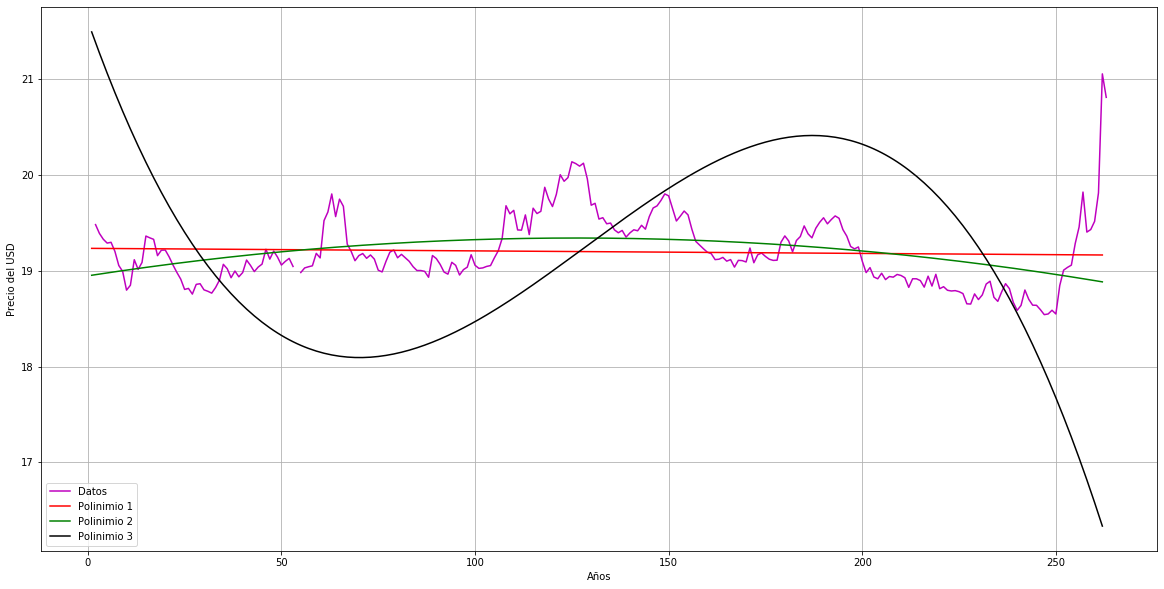

In [12]:


plt.figure(figsize=(20,10))
plt.plot(xpoints+1, ypoints,'m',ms=30, label='Datos')
plt.plot(x_p,yhat1,'r',ms=5,label='Polinimio 1')
plt.plot(x_p,yhat2,'g',ms=5,label='Polinimio 2')
plt.plot(x_p,yhat3,'k',ms=5,label='Polinimio 3')

plt.grid()
plt.xlabel('Años')
plt.ylabel('Precio del USD')
plt.legend(loc='best')

In [8]:
#grado 1:
b1 = np.zeros(2)
ajuste1 = opt.minimize(fun_obj, b1,args=(x,y,1))

NameError: name 'fun_obj' is not defined